# Operations on NumPy arrays

One of the most powerful features of NumPy is its ability to manipulate entire arrays of numbers in one go.

## Numerical operations

In Python, you can multiply a single number by another to get a new number:

In [1]:
single_number = 3.14
single_number * 2

6.28

However, if you try to multiply a list by a number it will give a perhaps strange result:

In [2]:
python_list = [3.14, 2.71, 1.18]
python_list * 2

[3.14, 2.71, 1.18, 3.14, 2.71, 1.18]

This is hapenning because Python's lists are not restricted to only hold numbers, nor must they only hold one consistent type, and so they do not have any special logic to account for the case where they *do* only have numbers in them. The only safe way to interpret `*` that works for all Python lists is "duplicate the array".

NumPy, however, is designed to deal with numerical data and so interprets the request differently:

In [3]:
import numpy as np

In [4]:
numpy_array = np.array([3.14, 2.71, 1.18])
numpy_array * 2

array([6.28, 5.42, 2.36])

![](../assets/diag_02-1.png) 

>Note than in the example diagrams I am showing a NumPy array as going vertically (like a column vector) whereas the print-out displays it horizontally.  I've chosen this layout as when we write code we write it left-to-right and displaying the diagrams like this makes it easier to line up between arrays. In reality, NumPy arrays do not have a physical direction anyway, only that which we attribute to them.</p></aside>

Here, each number has been multiplied by 2 individually.

You can perform any standard numerical operations to NumPy arrays, including `*`, `+`, `/`, `-` and `**`. You can also use comparison operations like `==`, `>` and `<=`. If your array contains booleans (`True`/`False`) then you can also use the binary logic operations such as `|` ("or") and `&` ("and") as well as the unary logical operator `~` ("not").

In all of these cases, it will apply the operation to each element of the array indivudually and give you back an array of the same size. One big benefit of this is an improvment in speed. NumPy arrays are of a homogeneous type, so there is no time lost in identifying and handling different data types like in lists. In addition, NumPy uses optimized C code for many of the the expensive computations. This means we can still use the intuitive syntax of the high-level Python language, but actually benefit from the speed of the pre-compiled, low-level C language.

### Exercise 3

> - Try multiplying the above array with different numbers
> - Subtract $3.04$ from each element of the array
> - Use a comparison operator to ask if each number is greater than $2.5$.

In [5]:
# Write your exercise code here.


[<small>answer</small>](../solutions/operations_simple.ipynb)

## Functions

As well as simple numerical operations, you will often also want to perform more complex operations on your data. For example, the cosine of a number. We can do this in plain Python with the `math` module:

In [6]:
import math

math.cos(single_number)

-0.9999987317275395

This works, but has the same problem as above in that it doesn't work as you want with a Python list:

In [7]:
math.cos(python_list)

TypeError: must be real number, not list

To help with this, NumPy provides [a large number of operations via the `numpy` namespace](https://numpy.org/doc/stable/reference/routines.math.html). They work the same way as the Python functions for single numbers:

In [8]:
np.cos(single_number)

-0.9999987317275395

But they also work with Python lists:

In [9]:
np.cos(python_list)

array([-0.99999873, -0.90830067,  0.38092482])

You see here that even though we passed it a Python list, it has returned the result as a NumPy array. We can also pass in a NumPy array directly:

In [10]:
np.cos(numpy_array)

array([-0.99999873, -0.90830067,  0.38092482])

![](../assets/diag_02-2.png)

There is a cost to passing in Python lists compared with using an array directly, as it has to convert it from one to the other. If you can, it's best to keep things as NumPy arrays throughout your computations.

## Abstractions

The ability for NumPy functions to work on plain numbers as well as NumPy arrays allows us to write code which works for both single values, as well as arrays of numbers. This avoids the need for type checks and makes our code more expressive.


Imagine we have a function, `poly` as part of our code which does *some maths* to its input, e.g.

$$
\mathrm{poly}: a \mapsto 4a - a^4
$$

In [11]:
def poly(a):
    return a * 4 - a ** 4

We can of course call this function with a single number and it give the result:

In [12]:
poly(single_number)

-84.65171216000002

Staying in the world of pure Python, we can try to pass a list, but of course it doesn't work as lists cannot be raised to a power:

In [13]:
poly(python_list)

TypeError: unsupported operand type(s) for ** or pow(): 'list' and 'int'

If we pass an array it works since NumPy arrays can apply operations to their elements automatically:

In [14]:
poly(numpy_array)

array([-84.65171216, -43.09580481,   2.78122224])

The key thing here is that one function can work on lots of different types of data. If you write your code to be able to deal with a single number, then NumPy will automatically make it able to do that same calculation to a whole load of numbers.

You do need to make sure that the code you write in your functions can work with NumPy arrays through. So you should use the NumPy functions like `np.cos` rather than `math.cos`. So to do:

$$
\mathrm{trig} : a \mapsto \sin(a) - \cos(a)
$$

you should write:

In [15]:
def trig(a):
    return np.sin(a) - np.cos(a)

which works with single numbers:

In [16]:
trig(single_number)

1.0015913846440263

and Python lists:

In [17]:
trig(python_list)

array([1.00159138, 1.32661861, 0.54368119])

and, of course, NumPy arrays:

In [18]:
trig(numpy_array)

array([1.00159138, 1.32661861, 0.54368119])

## Plotting arrays

As our arrays get longer and more complex, it's difficult to see what's going on by just looking at the numbers. Let's see how we can easily plot the data as a line graph. Let's make our data to be plotted:

In [19]:
# Numbers from 0 to 20. 100 of them.
x = np.linspace(0, 20, 100)

y = trig(x)

First, we need to import `matplotlib`, the defacto standard plotting tool for Python:

In [20]:
import matplotlib.pyplot as plt

Then, we need to make a place for the plotting to happen which we do with the `plt.subplots()` function. This returns two things, a `Figure` (the whole page, which may contain multiple plots) and and `Axes` (the space in which we will plot).

We then draw on the axes with `ax.plot` and pass it the $y$ values:

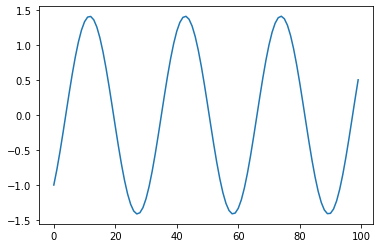

In [21]:
fig, ax = plt.subplots()

ax.plot(y)

It has done the plot and the the $y$ values are correct, but the $x$ axis has just been taken as the integer indexes of the array. If we want to label the $x$ axis then we can pass two arguments to `plot`:

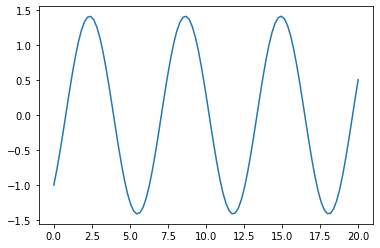

In [22]:
fig, ax = plt.subplots()

ax.plot(x, y)

### Exercise 4

> There is a CSV file in the week_4 directory called "bristol_rainfall.csv". The file contains annual rainfall amounts for Bristol since 1853. You can use the [NumPy loadtext function](https://numpy.org/doc/stable/reference/generated/numpy.loadtxt.html) to directly load it into NumPy arrays with:
>
>```python
> years = np.loadtxt('../assets/bristol_rainfall.csv', dtype='int', delimiter=',', usecols=0, skiprows=1)
> rainfall = np.loadtxt('../assets/bristol_rainfall.csv', dtype='float', delimiter=',', usecols=1, skiprows=1)
>```
>
>- Load the data and plot it as a line graph
>- Have a look at the [matplotlib subplots demo page](https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html) and use it to add an appropriate title and axes labels
>- Find the mean average, $\mu$, value in the data (have a look at the [list of statistical functions](https://numpy.org/doc/stable/reference/routines.statistics.html) to find an appropriate one)
>- Find the standard deviation, $\sigma$, of the data
>- Write a function which returns the ratio between the standard deviation and the mean, $\dfrac{\sigma}{\mu}$
>- Check that your function works with both Python lists as well as the `rainfall` array


In [23]:
# Write your exercise code here.

[<small>answer</small>](../solutions/operations_weather.ipynb)

## [[Previous: NumPy arrays](./01-numpy_arrays.ipynb)] | [[Next: Multi-dimensional arrays](./03-multi-dimensional_arrays.ipynb)]